# Import Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Load the Data:

In [2]:
data = pd.read_csv(r"Advertising.csv")
print(data.head())

   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


# Handling Missing Values:

In [3]:
data.dropna(inplace=True)

# Exploratory Data Analysis (EDA):

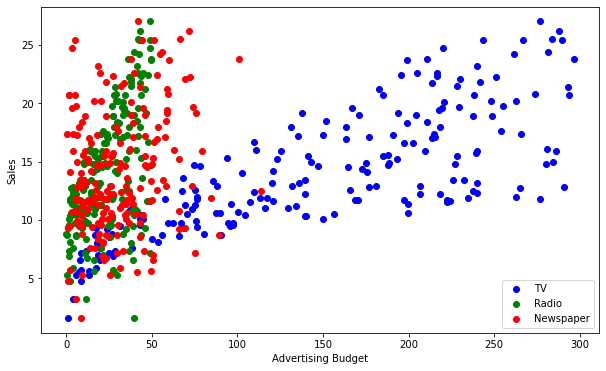

In [4]:
plt.figure(figsize=(10, 6))
plt.scatter(data['TV'], data['Sales'], c='blue', label='TV')
plt.scatter(data['Radio'], data['Sales'], c='green', label='Radio')
plt.scatter(data['Newspaper'], data['Sales'], c='red', label='Newspaper')
plt.xlabel('Advertising Budget')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Data Preprocessing:

In [5]:
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

# Split Data into Training and Testing Sets:

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a Preprocessing and Modeling Pipeline:

In [7]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Normalize features
    ('model', LinearRegression())   # Linear Regression model
])

# Train the Model:

In [8]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])

# Evaluate the Model:

In [9]:
y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 3.174097353976106


# Predict with New Data:

In [10]:
new_data = pd.DataFrame({
    "TV": [100],
    "Radio": [25],
    "Newspaper": [10]
})

predicted_sales = pipeline.predict(new_data)
print("Predicted Sales:", predicted_sales)

Predicted Sales: [12.20950658]
